In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import birdsonganalysis as bsa
from scipy.io import wavfile
sns.set_palette('colorblind')

In [49]:
songname = 'simple'

sr, tutor = wavfile.read('../data/{}.wav'.format(songname))
sr, synth = wavfile.read('../data/{}_out.wav'.format(songname))

In [3]:
sim = bsa.similarity(synth, tutor, samplerate=sr, threshold=0.05)

In [37]:
sim['similarity']

0.34382600561272214

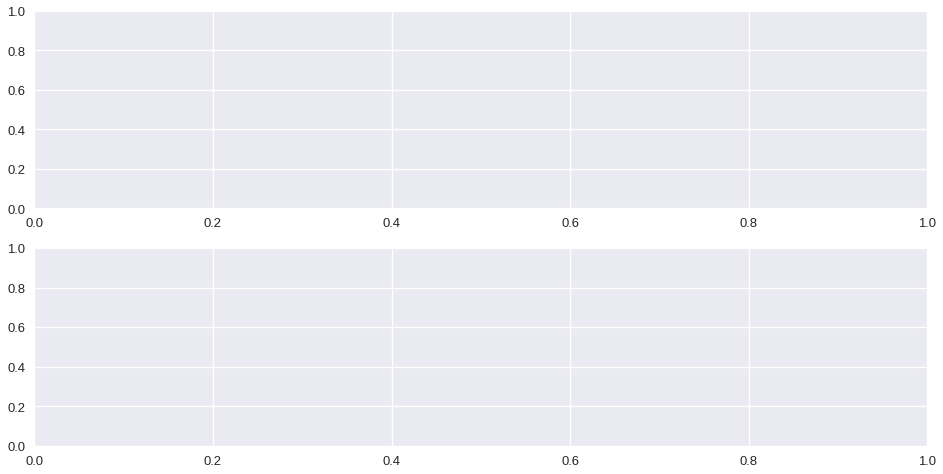

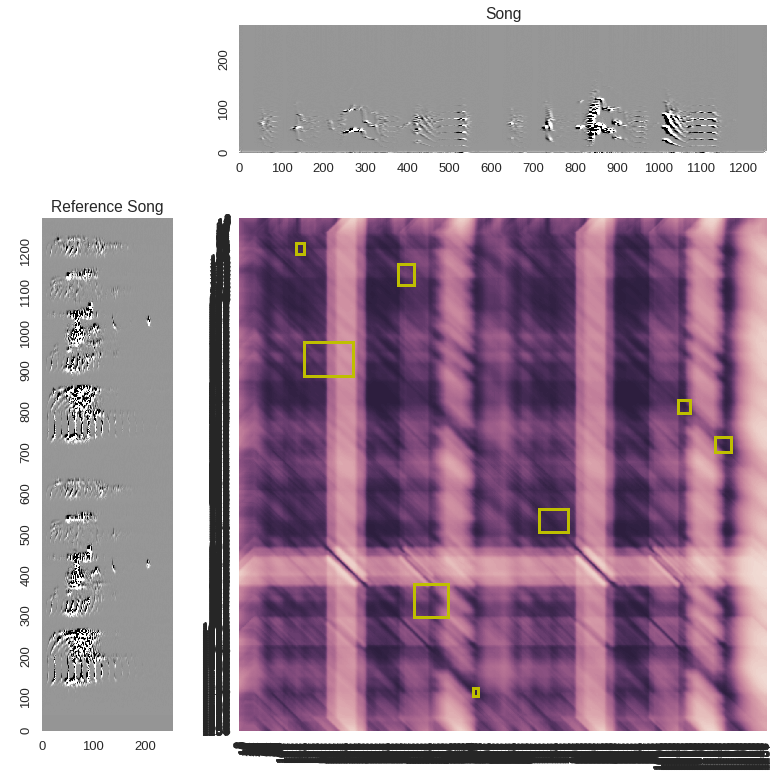

In [38]:
fig = bsa.similarity_plot(sim, synth, tutor)
plt.show(fig)

In [50]:
fstep = 40
fsize = 1024
sdt = bsa.spectral_derivs(tutor, 256, fstep, fsize)
sds = bsa.spectral_derivs(synth, 256, fstep, fsize)

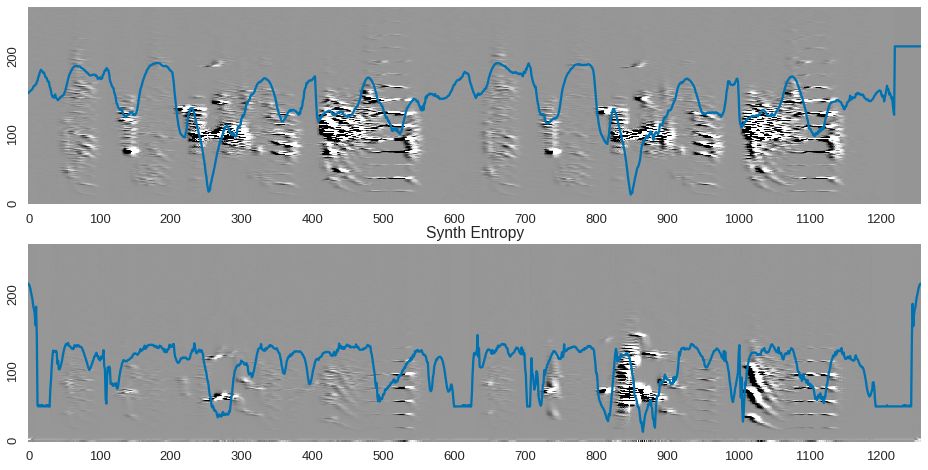

In [51]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
ax1 = bsa.spectral_derivs_plot(sdt, ax=ax1)
bsa.plot_over_spec(bsa.song_wiener_entropy(tutor, 256, fstep, fsize), ax1)

ax2 = bsa.spectral_derivs_plot(sds, ax=ax2)
bsa.plot_over_spec(bsa.song_wiener_entropy(synth, 256, fstep, fsize), ax2)
ax2.set_title('Synth Entropy')
plt.show(fig)

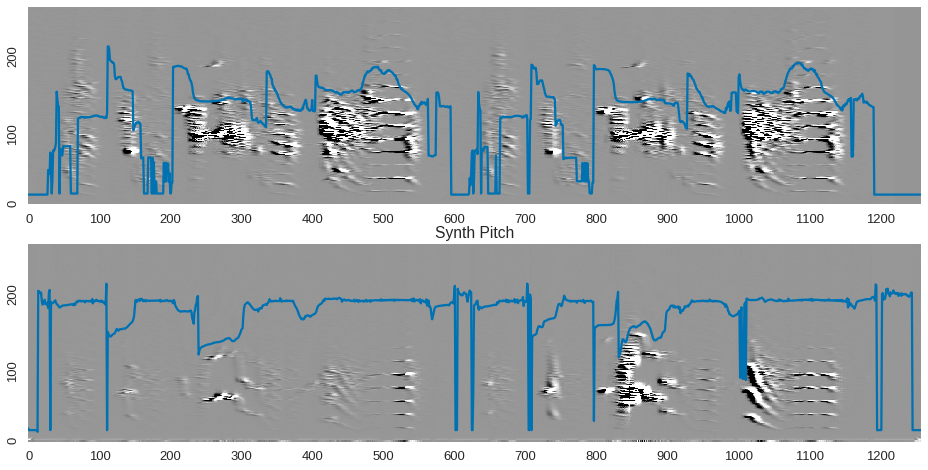

In [57]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
ax1 = bsa.spectral_derivs_plot(sdt, ax=ax1)
bsa.plot_over_spec(bsa.song_pitch(tutor, sr, 0.8, 256, fstep, fsize), ax1)

pitch = bsa.song_pitch(synth, sr, 0.8, 256, fstep, fsize)
ax2 = bsa.spectral_derivs_plot(sds, ax=ax2)
bsa.plot_over_spec(pitch, ax2)
ax2.set_title('Synth Pitch')
plt.show(fig)

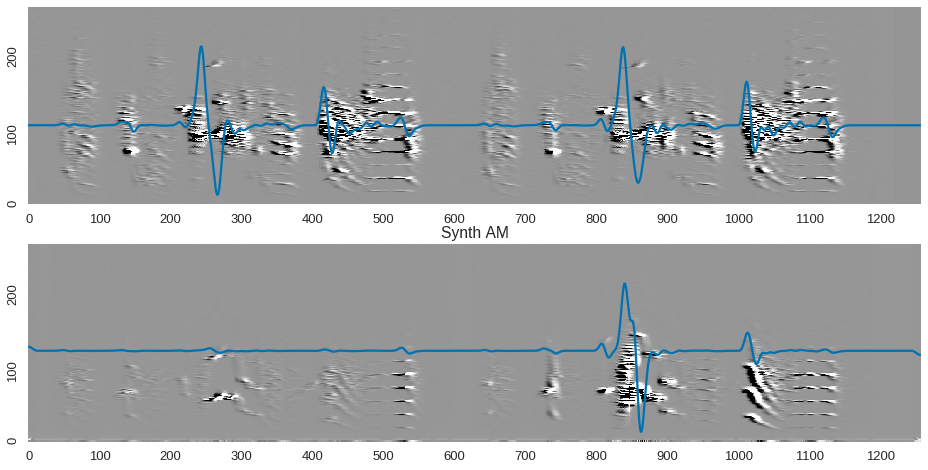

In [58]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
ax1 = bsa.spectral_derivs_plot(sdt, ax=ax1)
bsa.plot_over_spec(bsa.song_amplitude_modulation(tutor, 256, fstep, fsize), ax1)

ax2 = bsa.spectral_derivs_plot(sds, ax=ax2)
bsa.plot_over_spec(bsa.song_amplitude_modulation(synth, 256, fstep, fsize), ax2)
ax2.set_title('Synth AM')

plt.show(fig)

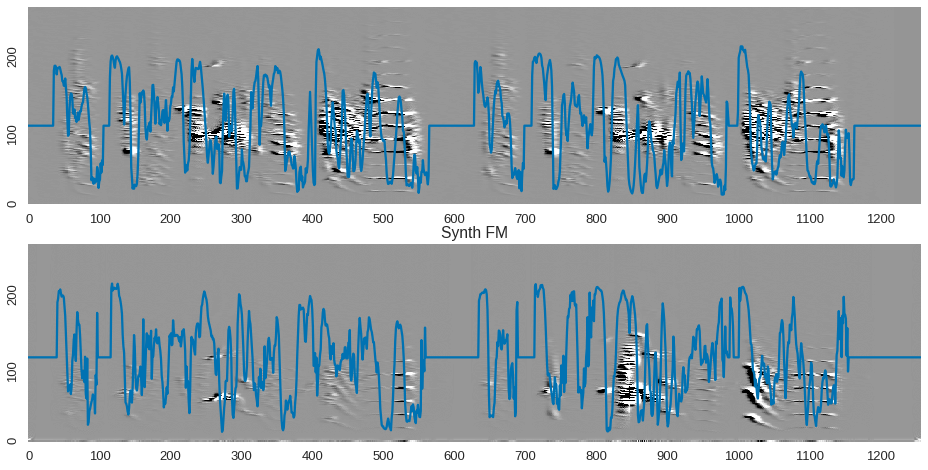

In [59]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
ax1 = bsa.spectral_derivs_plot(sdt, ax=ax1)
fm = bsa.song_frequency_modulation(tutor, 256, fstep, fsize)
fm[bsa.song_amplitude(tutor, 256, fstep, fsize) < 60] = np.median(fm[bsa.song_amplitude(tutor, 256, fstep, fsize) > 60])
bsa.plot_over_spec(fm, ax1)

ax2 = bsa.spectral_derivs_plot(sds, ax=ax2)
fm = bsa.song_frequency_modulation(synth, 256, fstep, fsize)
fm[bsa.song_amplitude(synth, 256, fstep, fsize) < 60] = np.median(fm[bsa.song_amplitude(synth, 256, fstep, fsize) > 60])
bsa.plot_over_spec(fm, ax2)
ax2.set_title('Synth FM')
plt.show(fig)

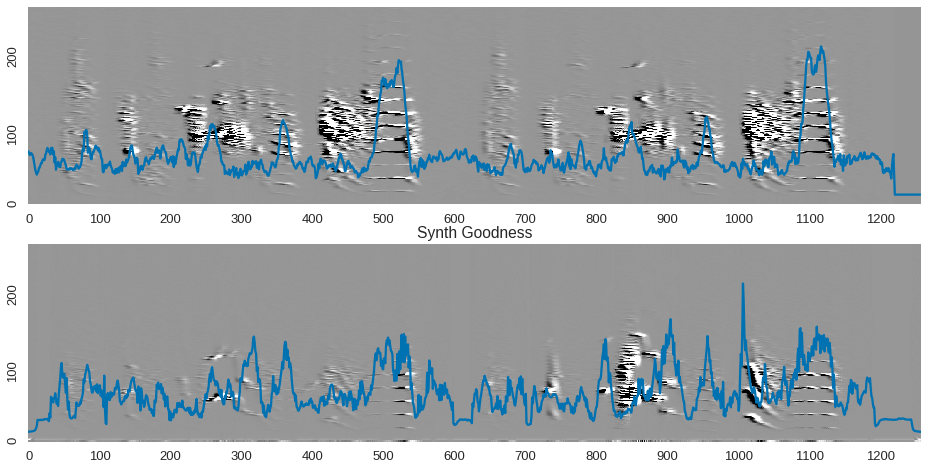

In [60]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
ax1 = bsa.spectral_derivs_plot(sdt, ax=ax1)
bsa.plot_over_spec(bsa.song_goodness(tutor, 256, fstep, fsize), ax1)

ax2 = bsa.spectral_derivs_plot(sds, ax=ax2)
bsa.plot_over_spec(bsa.song_goodness(synth, 256, fstep, fsize), ax2)
ax2.set_title('Synth Goodness')
plt.show(fig)

# Let see for one syllable

In [41]:
sr, tutor = wavfile.read('../data/ba_syllable_a_end.wav')
sr, synth = wavfile.read('../data/ba_syllable_a_end_out.wav')
sr, hillc = wavfile.read('../model/hillclimbing/out.wav')

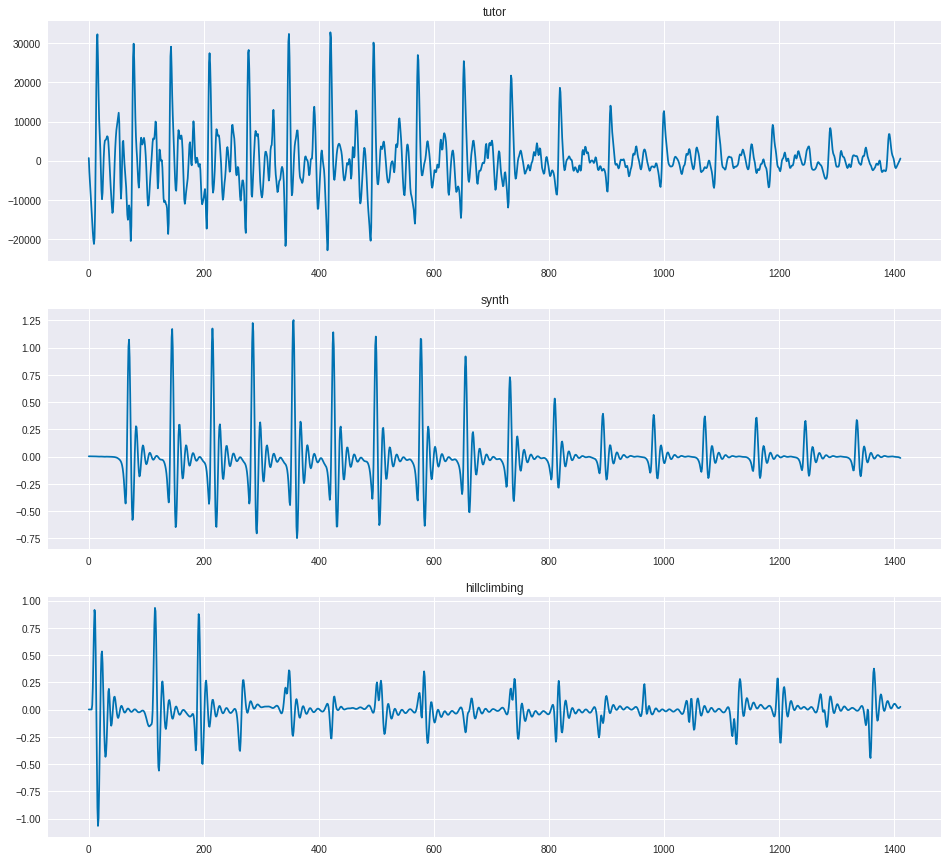

In [26]:
fig, axs = plt.subplots(3, 1, figsize=(16, 5*3))
axs[0].plot(tutor)
axs[0].set_title('tutor')
axs[1].plot(synth - np.mean(synth))
axs[1].set_title('synth')
axs[2].plot(hillc - np.mean(hillc))
axs[2].set_title('hillclimbing')
plt.show()

In [42]:
tfeat = bsa.all_song_features(tutor, sr, pitch_threshold=0.8, fft_size=fsize, fft_step=fstep)
sfeat = bsa.all_song_features(synth, sr, pitch_threshold=0.8, fft_size=fsize, fft_step=fstep)
hfeat = bsa.all_song_features(hillc, sr, pitch_threshold=0.8, fft_size=fsize, fft_step=fstep)

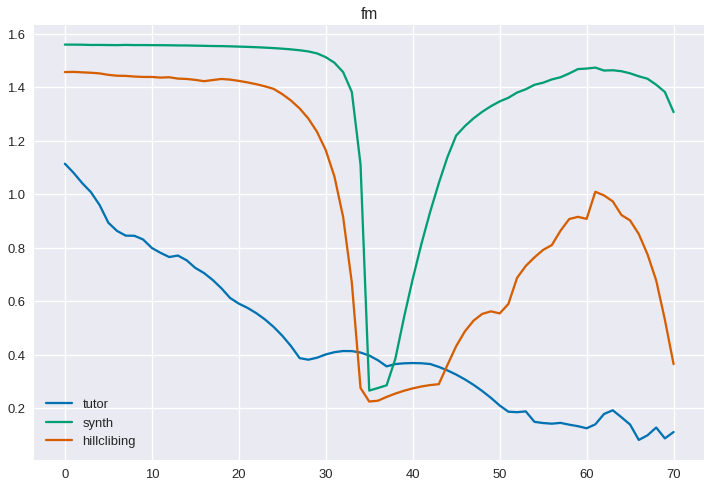

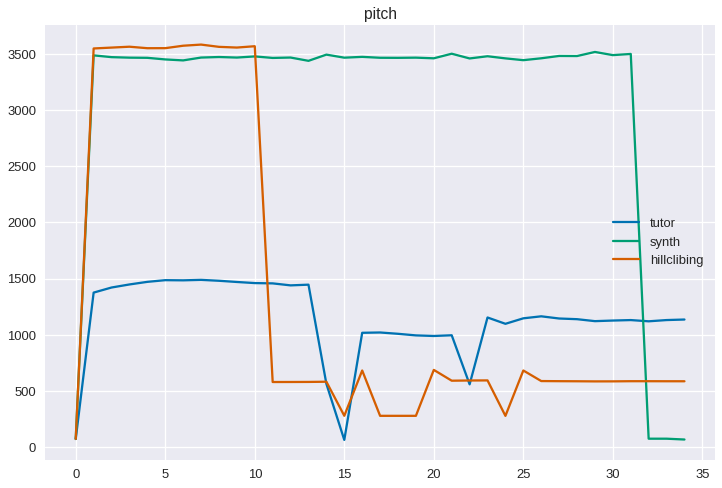

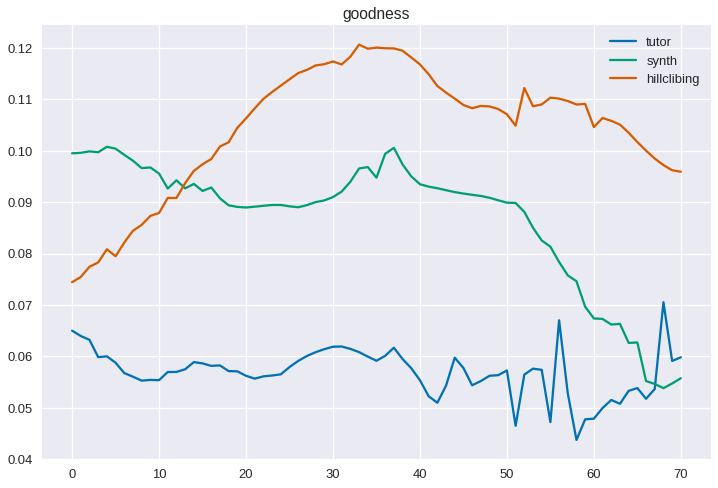

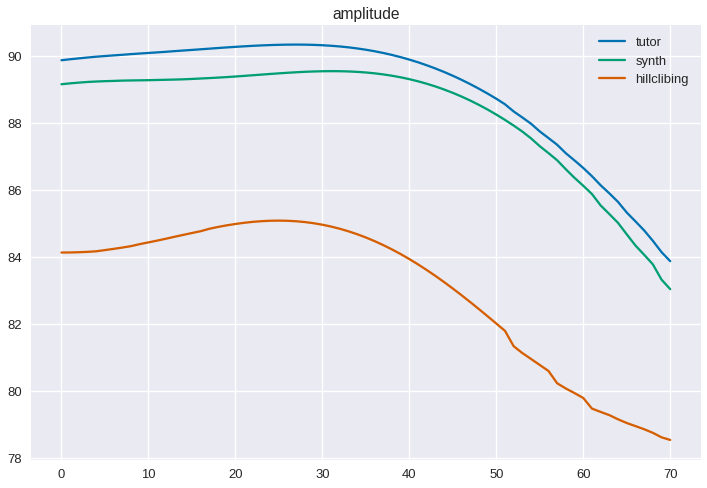

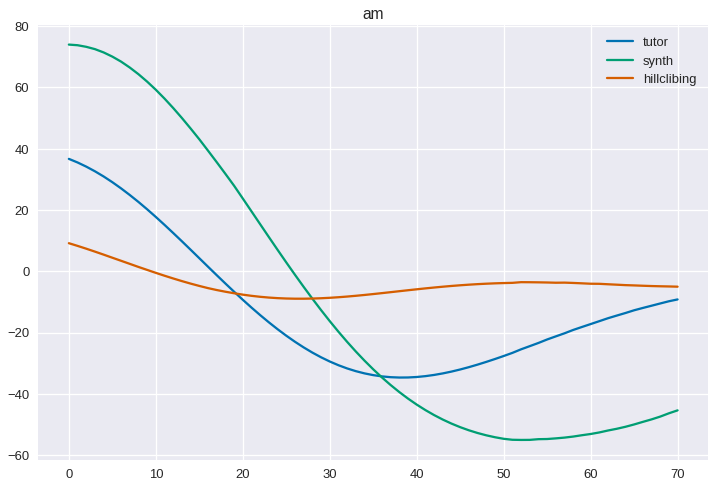

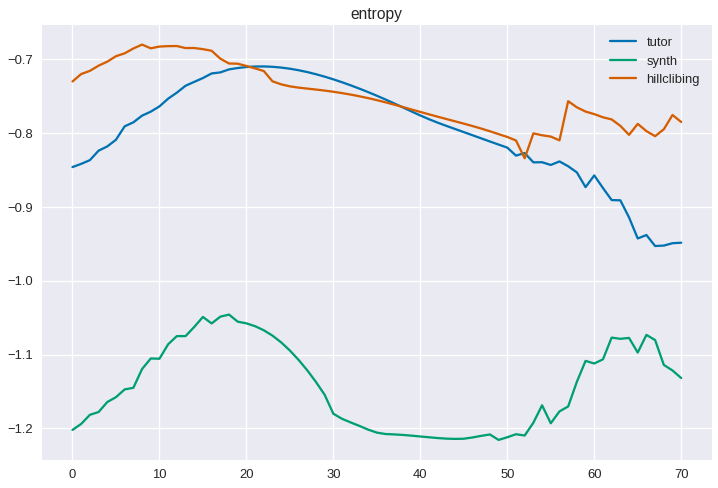

In [43]:
sns.set_context('talk')

for fname in tfeat:
    plt.figure(figsize=(12, 12/(1.5)))
    plt.plot(tfeat[fname], label='tutor')
    plt.plot(sfeat[fname], label='synth')
    plt.plot(hfeat[fname], label='hillclibing')
    plt.legend()
    plt.title(fname)
    plt.show()

In [44]:
for fname in tfeat:
    print("*"*40)
    print(fname)
    print('tutor: mean: {}, std: {}'.format(np.mean(tfeat[fname]), np.std(tfeat[fname])))
    print('synth: mean: {}, std: {}'.format(np.mean(sfeat[fname]), np.std(sfeat[fname])))
    print('hill: mean: {}, std: {}'.format(np.mean(hfeat[fname]), np.std(hfeat[fname])))

****************************************
fm
tutor: mean: 0.4472513451262707, std: 0.28152150079643007
synth: mean: 1.3545229064099917, std: 0.3278193070718943
hill: mean: 0.962388380436447, std: 0.4418113405413447
****************************************
pitch
tutor: mean: 1137.7829550606864, std: 354.1263447631948
synth: mean: 3081.810687473842, std: 1080.9142992297154
hill: mean: 1385.8060740879603, std: 1381.9277390349314
****************************************
goodness
tutor: mean: 0.05693614484299198, std: 0.004609346459319723
synth: mean: 0.08684199740036888, std: 0.012815148842040302
hill: mean: 0.10419012195043689, std: 0.012305435110666122
****************************************
amplitude
tutor: mean: 88.97965144715997, std: 1.810946541069014
synth: mean: 88.29499830970475, std: 1.764900525814426
hill: mean: 83.03239315761869, std: 2.171290271422884
****************************************
am
tutor: mean: -12.20892145877767, std: 21.183523347657193
synth: mean: -9.8262200564